Alejandro Restrepo Giraldo CC: 1001389709

# Laboratorio 6.0

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_circles
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [39]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [64]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [65]:
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
dicc = {'sepal length': X[:,0], 'sepal width': X[:,1], 'petal length':X[:,2] , 
        'petal width':X[:,3], 'class':Y }

In [67]:
df = pd.DataFrame(dicc)
df

sepal length  sepal width  petal length  petal width  class
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]

In [68]:
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ] 
cols = [col.replace(")" ,"") for col in columns_name ] 
df.columns = cols

In [69]:
df

SepalLength  SepalWidth  PetalLength  PetalWidth  Class
0            5.1         3.5          1.4         0.2      0
1            4.9         3.0          1.4         0.2      0
2            4.7         3.2          1.3         0.2      0
3            4.6         3.1          1.5         0.2      0
4            5.0         3.6          1.4         0.2      0
..           ...         ...          ...         ...    ...
145          6.7         3.0          5.2         2.3      2
146          6.3         2.5          5.0         1.9      2
147          6.5         3.0          5.2         2.0      2
148          6.2         3.4          5.4         2.3      2
149          5.9         3.0          5.1         1.8      2

[150 rows x 5 columns]

In [70]:
print("Número de datos:", df.shape)
print("Número de Null:", df.isnull().sum(1).sum())

Número de datos: (150, 5)
Número de Null: 0


# Distribuciones de características

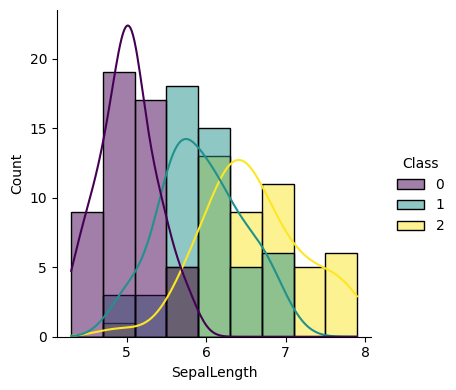

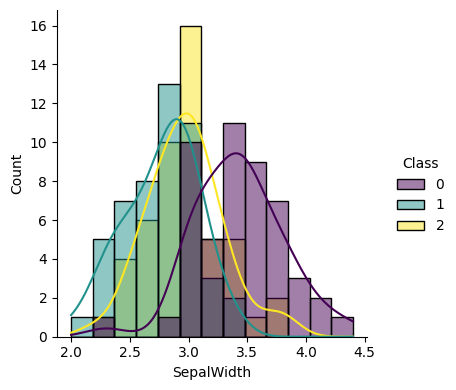

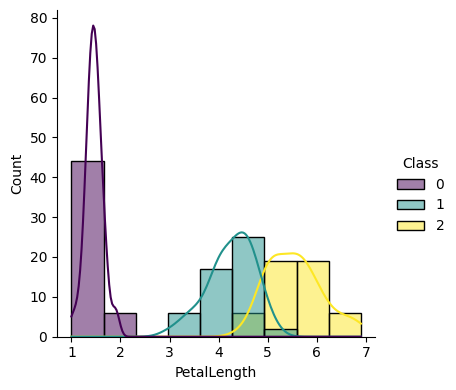

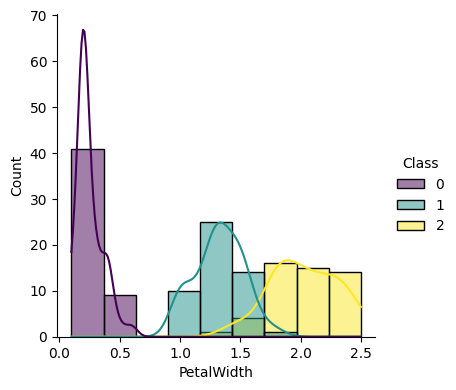

In [71]:
import seaborn as sns

sns.displot(df, x = "SepalLength", hue = "Class",  kde = True, height = 4, palette = 'viridis')
plt.xlabel('SepalLength')
plt.show()

# -----------------------------------------------------------

sns.displot(df, x = "SepalWidth", hue = "Class",  kde = True, height = 4, palette = 'viridis')
plt.xlabel('SepalWidth')
plt.show()

# -----------------------------------------------------------

sns.displot(df, x = "PetalLength", hue = "Class",  kde = True, height = 4, palette = 'viridis')
plt.xlabel('PetalLength')
plt.show()

# -----------------------------------------------------------

sns.displot(df, x = "PetalWidth", hue = "Class",  kde = True, height = 4, palette = 'viridis')
plt.xlabel('PetalWidth')
plt.show()

# Matriz de correlación:

In [72]:
df.loc[:,'SepalLength':'PetalWidth'].corr()

SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000   -0.117570     0.871754    0.817941
SepalWidth     -0.117570    1.000000    -0.428440   -0.366126
PetalLength     0.871754   -0.428440     1.000000    0.962865
PetalWidth      0.817941   -0.366126     0.962865    1.000000

<AxesSubplot:>

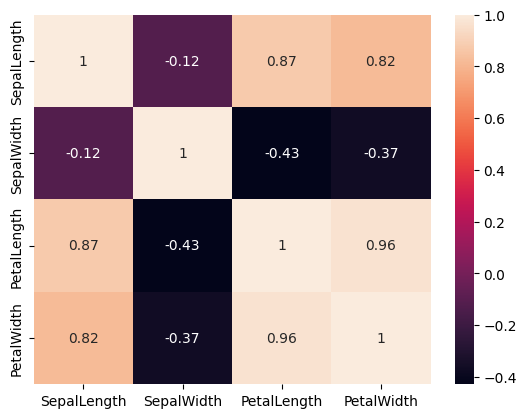

In [73]:
sns.heatmap(df.loc[:,'SepalLength':'PetalWidth'].corr(), annot=True)


# Separación de datos

In [74]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Class"]):

    strat_train_set = df.loc[train_index] 
    strat_test_set = df.loc[test_index]

### Datos de entrenamiento:

In [75]:
strat_train_set

SepalLength  SepalWidth  PetalLength  PetalWidth  Class
8            4.4         2.9          1.4         0.2      0
106          4.9         2.5          4.5         1.7      2
76           6.8         2.8          4.8         1.4      1
9            4.9         3.1          1.5         0.1      0
89           5.5         2.5          4.0         1.3      1
..           ...         ...          ...         ...    ...
37           4.9         3.6          1.4         0.1      0
2            4.7         3.2          1.3         0.2      0
33           5.5         4.2          1.4         0.2      0
52           6.9         3.1          4.9         1.5      1
3            4.6         3.1          1.5         0.2      0

[120 rows x 5 columns]

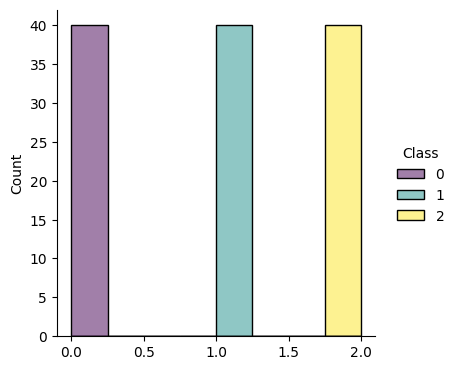

In [76]:
sns.displot(strat_train_set, x = "Class", hue = "Class", height = 4, palette = 'viridis')
plt.xlabel('')
plt.show()

### Datos de test:

In [77]:
strat_test_set

SepalLength  SepalWidth  PetalLength  PetalWidth  Class
38           4.4         3.0          1.3         0.2      0
127          6.1         3.0          4.9         1.8      2
57           4.9         2.4          3.3         1.0      1
93           5.0         2.3          3.3         1.0      1
42           4.4         3.2          1.3         0.2      0
56           6.3         3.3          4.7         1.6      1
22           4.6         3.6          1.0         0.2      0
20           5.4         3.4          1.7         0.2      0
147          6.5         3.0          5.2         2.0      2
84           5.4         3.0          4.5         1.5      1
107          7.3         2.9          6.3         1.8      2
141          6.9         3.1          5.1         2.3      2
104          6.5         3.0          5.8         2.2      2
51           6.4         3.2          4.5         1.5      1
7            5.0         3.4          1.5         0.2      0
49           5.0         3.3          1.4         0.2      0
14           5.8         4.0          1.2         0.2      0
69           5.6         2.5          3.9         1.1      1
63           6.1         2.9          4.7         1.4      1
138          6.0         3.0          4.8         1.8      2
10           5.4         3.7          1.5         0.2      0
140          6.7         3.1          5.6         2.4      2
58           6.6         2.9          4.6         1.3      1
134          6.1         2.6          5.6         1.4      2
132          6.4         2.8          5.6         2.2      2
77           6.7         3.0          5.0         1.7      1
75           6.6         3.0          4.4         1.4      1
18           5.7         3.8          1.7         0.3      0
116          6.5         3.0          5.5         1.8      2
28           5.2         3.4          1.4         0.2      0

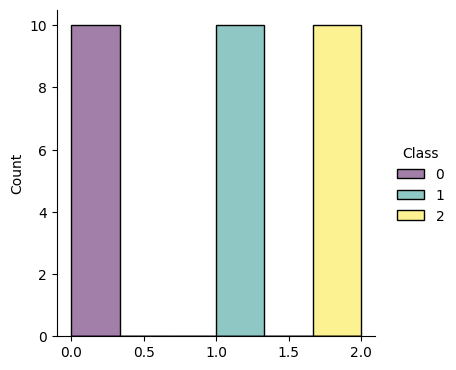

In [78]:
sns.displot(strat_test_set, x = "Class", hue = "Class", height = 4, palette = 'viridis')
plt.xlabel('')
plt.show()

Los datos se clasifican en igual frecuencia por cada clase debido a que esta es la distribución del conjunto de datos original

# Modelo de regresión logística entre plantas setosas y no setosas

In [128]:
# Se cambian las características a setosa = 1 y no setosa = 0
arr = strat_train_set.Class.to_numpy()
arrsns = []
for i in range(0,len(arr)):
    if arr[i] == 0:
        arrsns.append(1)
    else:
        arrsns.append(0)

In [129]:
strat_train_setCOPY = strat_train_set.copy()
strat_train_setCOPY['Class'] = arrsns
strat_train_setCOPY

SepalLength  SepalWidth  PetalLength  PetalWidth  Class
8            4.4         2.9          1.4         0.2      1
106          4.9         2.5          4.5         1.7      0
76           6.8         2.8          4.8         1.4      0
9            4.9         3.1          1.5         0.1      1
89           5.5         2.5          4.0         1.3      0
..           ...         ...          ...         ...    ...
37           4.9         3.6          1.4         0.1      1
2            4.7         3.2          1.3         0.2      1
33           5.5         4.2          1.4         0.2      1
52           6.9         3.1          4.9         1.5      0
3            4.6         3.1          1.5         0.2      1

[120 rows x 5 columns]

In [130]:
strat_test_setCOPY = strat_test_set.copy()

In [131]:
clf = LogisticRegression().fit(strat_train_setCOPY.loc[:,"SepalLength":"PetalWidth"], strat_train_setCOPY.Class)

In [132]:
# Score del training set
clf.score(strat_train_setCOPY.loc[:,"SepalLength":"PetalWidth"], strat_train_setCOPY.Class)

1.0

In [133]:
# Se cambian las características a setosa = 1 y no setosa = 0
arr = strat_test_setCOPY.Class.to_numpy()
arrsns = []
for i in range(0,len(arr)):
    if arr[i] == 0:
        arrsns.append(1)
    else:
        arrsns.append(0)
        
strat_test_setCOPY['Class'] = arrsns

#print(arrsns)
clf.predict(strat_test_setCOPY.loc[:,"SepalLength":"PetalWidth"])

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1])

In [134]:
# Score del test set
clf.score(strat_test_setCOPY.loc[:,"SepalLength":"PetalWidth"], strat_test_setCOPY.Class)

1.0

In [155]:
#Generamos los valores de X_new 
X_new = np.linspace(0, 10, 1000).reshape(250, 4)
#X_new

In [156]:
# Estimación de probabilidad
prob = clf.predict_proba(X_new)
#prob

/home/usuario/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [157]:
prediction = clf.predict(X_new)

/home/usuario/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [158]:
# Frontera de decisión
decision_boundary = X_new[prob[:, 0] >= 0.5] 
#decision_boundary

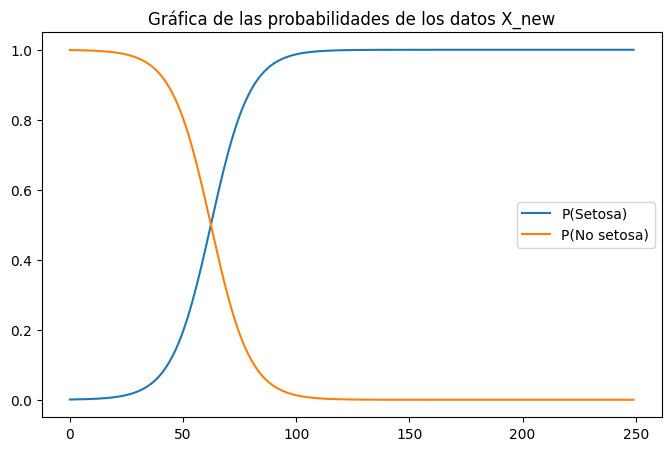

In [159]:
fig = plt.figure(figsize = (8,5))
plt.title("Gráfica de las probabilidades de los datos X_new")
plt.plot(prob, label = ["P(Setosa)","P(No setosa)"])
plt.legend()
plt.show()

# Modelo de regresión logística entre setosa, versicolour y virginica

In [160]:
clf = LogisticRegression().fit(strat_train_set.loc[:,"SepalLength":"PetalWidth"], strat_train_set.Class)

In [161]:
# Score del training set
clf.score(strat_train_set.loc[:,"SepalLength":"PetalWidth"], strat_train_set.Class)

0.975

In [162]:
clf.score(strat_test_set.loc[:,"SepalLength":"PetalWidth"], strat_test_set.Class)

0.9666666666666667

In [163]:
X = np.array([[4.9, 5.0, 1.8, 0.3]])
clf.predict(X)

/home/usuario/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [164]:
clf.predict_proba(X)

/home/usuario/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[9.92132183e-01, 7.86775448e-03, 6.24422075e-08]])

La flor tiene un 0.99213 de probabilidad de ser setosa